In [24]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###**Step 1 and 2**

In [25]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
doc = cv.imread('/content/drive/MyDrive/Resources_2.2/doc.jpg', 0)
threshold = 200
ret, doc_bin = cv.threshold(doc, threshold, 255, cv.THRESH_BINARY)
doc_bin = 255 - doc_bin

###**Step 3**

In [26]:
num_labels, labels, stats, centroids = cv.connectedComponentsWithStats(doc_bin, connectivity=8)

###Step 4

In [27]:
candidate_points = np.zeros(doc_bin.shape, dtype="uint8")

In [28]:
height, width = doc_bin.shape
for i in range(0, height):
 for j in range(0, width):
  if doc_bin[i, j] > 0:
   candidate_points[i, j] = doc_bin[i,j]

In [29]:
cv.imwrite('candidate_image1.jpg', candidate_points)

True

In [30]:
candidate_points = np.zeros(doc_bin.shape, dtype="uint8")

In [31]:
for i in centroids.astype(int):
  v = i
  x = v[0]
  y = v[1]
  candidate_points[int(y),int(x)] = 255

In [32]:
cv.imwrite('candidate_image2.jpg', candidate_points)

True

In [33]:
candidate_points = np.zeros(doc_bin.shape, dtype="uint8")

In [34]:
for i in range(1, len(centroids)):
            component_points = np.argwhere(labels == i)
            if component_points.size > 0:
                max_point = component_points[np.argmax(component_points[:, 1])]
                candidate_points[max_point[0], max_point[1]] = 255

In [35]:
cv.imwrite('candidate_image3.jpg', candidate_points)

True

In [36]:
import math
spatial_res = 1
angular_res = math.pi/180
threshold = 10

In [37]:
lines = cv.HoughLines(candidate_points, spatial_res, angular_res, threshold)

In [38]:
angles = []
for k in range(0,len(lines)):
  distance, angle = lines[k][0]
  angles.append(angle)

In [39]:
import statistics
angles = statistics.median(angles)

In [40]:
document_angle = angles - math.pi / 2

In [41]:
print(document_angle)

-0.3752458850529532


True

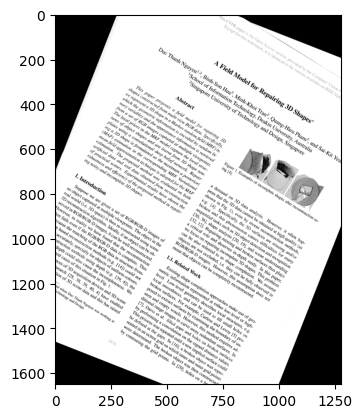

In [42]:
# rotate image
height, width = doc.shape
c_x = (width - 1) / 2.0 # column index varies in [0, width-1]
c_y = (height - 1) / 2.0 # row index varies in [0, height-1]
c = (c_x, c_y) # A point is defined by x and y coordinate
M = cv.getRotationMatrix2D(c, document_angle*180/math.pi, 1)
doc_deskewed = cv.warpAffine(doc, M, (width, height))
plt.imshow(doc_deskewed, 'gray')
cv.imwrite('doc_deskewed.jpg', doc_deskewed)

#2. Performance analysis

###2.1. Candidate point selection

In [43]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import time
doc = cv.imread('/content/drive/MyDrive/Resources_2.2/doc.jpg', 0)

In [44]:
start = time.time()
candidate_points = np.zeros(doc_bin.shape, dtype="uint8")
height, width = doc_bin.shape
for i in range(0, height):
 for j in range(0, width):
  if doc_bin[i, j] > 0:
   candidate_points[i, j] = doc_bin[i,j]
end = time.time() - start
print('Time required for this strategy is: ',end,' seconds')

Time required for this strategy is:  3.816938638687134  seconds


#Strategy 2

In [45]:
start = time.time()
candidate_points = np.zeros(doc_bin.shape, dtype="uint8")
for i in centroids.astype(int):
  v = i
  x = v[0]
  y = v[1]
  candidate_points[int(y),int(x)] = 255
end = time.time() - start
print('Time required for this strategy is: ',end,' seconds')

Time required for this strategy is:  0.018023014068603516  seconds


#Strategy 3

In [46]:
start = time.time()
candidate_points = np.zeros(doc_bin.shape, dtype="uint8")
for i in range(1, len(centroids)):
            component_points = np.argwhere(labels == i)
            if component_points.size > 0:
                max_point = component_points[np.argmax(component_points[:, 1])]
                candidate_points[max_point[0], max_point[1]] = 255
end = time.time() - start
print('Time required for this strategy is: ',end,' seconds')

Time required for this strategy is:  31.155380487442017  seconds


#Step 7

In [47]:
candidate_points = np.zeros(doc_bin.shape, dtype="uint8")
for i in range(1,num_labels):
  centroid_x,centroid_y = centroids[i]
  candidate_points[int(centroid_y),int(centroid_x)] = 255
start = time.time()
lines = cv.HoughLines(doc, spatial_res, angular_res, threshold)
angles = []
for k in range(0,len(lines)):
  distance, angle = lines[k][0]
  angles.append(angle)
end = time.time() - start
print('Time required for this step 7 is: ',end,' seconds')

Time required for this step 7 is:  0.8231632709503174  seconds


#Whole Process

In [48]:
start = time.time()
doc = cv.imread('/content/drive/MyDrive/Resources_2.2/doc.jpg', 0)
threshold = 200
ret, doc_bin = cv.threshold(doc, threshold, 255, cv.THRESH_BINARY)
doc_bin = 255 - doc_bin
num_labels, labels, stats, centroids = cv.connectedComponentsWithStats(doc_bin, connectivity=8)

#Strategy 1

candidate_points = np.zeros(doc_bin.shape, dtype="uint8")


height, width = doc_bin.shape
for i in range(0, height):
 for j in range(0, width):
  if doc_bin[i, j] > 0:
   candidate_points[i, j] = doc_bin[i,j]

#Strategy 1 ends here


#Strategy 2

candidate_points = np.zeros(doc_bin.shape, dtype="uint8")
for i in centroids.astype(int):
  v = i
  x = v[0]
  y = v[1]
  candidate_points[int(y),int(x)] = 255


#Strategy 2 ends here

#Strategy 3

candidate_points = np.zeros(doc_bin.shape, dtype="uint8")
for i in range(1, len(centroids)):
            component_points = np.argwhere(labels == i)
            if component_points.size > 0:
                max_point = component_points[np.argmax(component_points[:, 1])]
                candidate_points[max_point[0], max_point[1]] = 255

#Strategy 3 ends here

import math
spatial_res = 1
angular_res = math.pi/180
threshold = 10

lines = cv.HoughLines(candidate_points, spatial_res, angular_res, threshold)

angles = []
for k in range(0,len(lines)):
  distance, angle = lines[k][0]
  angles.append(angle)


import statistics
angles = statistics.median(angles)

document_angle = angles - math.pi / 2
# rotate image
height, width = doc.shape
c_x = (width - 1) / 2.0 # column index varies in [0, width-1]
c_y = (height - 1) / 2.0 # row index varies in [0, height-1]
c = (c_x, c_y) # A point is defined by x and y coordinate
M = cv.getRotationMatrix2D(c, document_angle, 1)
doc_deskewed = cv.warpAffine(doc, M, (width, height))

end = time.time() - start
print('Time required for this step is: ',end,' seconds')

Time required for this step is:  33.77268123626709  seconds


### Strategy 1

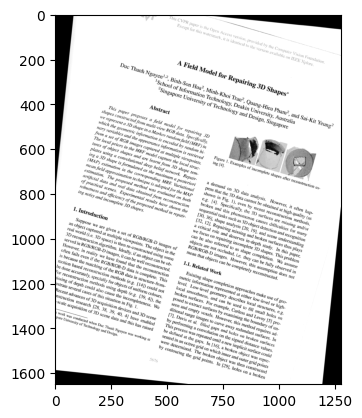

True

In [54]:
doc = cv.imread('/content/drive/MyDrive/Resources_2.2/doc.jpg', 0)
threshold = 200
ret, doc_bin = cv.threshold(doc, threshold, 255, cv.THRESH_BINARY)
doc_bin = 255 - doc_bin
num_labels, labels, stats, centroids = cv.connectedComponentsWithStats(doc_bin, connectivity=8)

candidate_points = np.zeros(doc_bin.shape, dtype="uint8")

height, width = doc_bin.shape
for i in range(0, height):
 for j in range(0, width):
  if doc_bin[i, j] > 0:
   candidate_points[i, j] = doc_bin[i,j]

import math
spatial_res = 1
angular_res = math.pi/180
threshold = 10

lines = cv.HoughLines(candidate_points, spatial_res, angular_res, threshold)

angles = np.zeros(len(lines),np.float32)
for k in range(0,len(lines)):
  distance, angle = lines[k][0]
  angles[k] = angle

import statistics
angles = statistics.median(angles)

document_angle = angles - math.pi / 2


height, width = doc.shape
c_x = (width - 1) / 2.0 # column index varies in [0, width-1]
c_y = (height - 1) / 2.0 # row index varies in [0, height-1]
c = (c_x, c_y) # A point is defined by x and y coordinate
M = cv.getRotationMatrix2D(c, document_angle*180/math.pi, 1)
doc_deskewed = cv.warpAffine(doc, M, (width, height))
plt.imshow(doc_deskewed, 'gray')
plt.show()
cv.imwrite('doc_deskewed1.jpg', doc_deskewed)

###Strategy 2

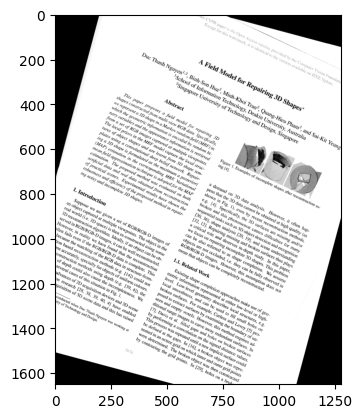

True

In [53]:
doc = cv.imread('/content/drive/MyDrive/Resources_2.2/doc.jpg', 0)
threshold = 200
ret, doc_bin = cv.threshold(doc, threshold, 255, cv.THRESH_BINARY)
doc_bin = 255 - doc_bin
num_labels, labels, stats, centroids = cv.connectedComponentsWithStats(doc_bin, connectivity=8)
candidate_points = np.zeros(doc_bin.shape, dtype="uint8")

for i in centroids.astype(int):
  v = i
  x = v[0]
  y = v[1]
  candidate_points[int(y),int(x)] = 255

import math
spatial_res = 1
angular_res = math.pi/180
threshold = 10

lines = cv.HoughLines(candidate_points, spatial_res, angular_res, threshold)

angles = np.zeros(len(lines),np.float32)
for k in range(0,len(lines)):
  distance, angle = lines[k][0]
  angles[k] = angle


import statistics
angles = statistics.median(angles)

document_angle = angles - math.pi / 2


# rotate image
height, width = doc.shape
c_x = (width - 1) / 2.0 # column index varies in [0, width-1]
c_y = (height - 1) / 2.0 # row index varies in [0, height-1]
c = (c_x, c_y) # A point is defined by x and y coordinate
M = cv.getRotationMatrix2D(c, document_angle*180/math.pi, 1)
doc_deskewed = cv.warpAffine(doc, M, (width, height))
plt.imshow(doc_deskewed, 'gray')
plt.show()
cv.imwrite('doc_deskewed2.jpg', doc_deskewed)

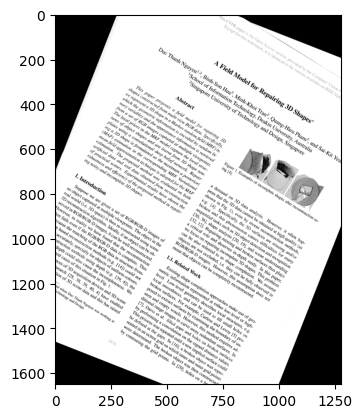

True

In [55]:
doc = cv.imread('/content/drive/MyDrive/Resources_2.2/doc.jpg', 0)
threshold = 200
ret, doc_bin = cv.threshold(doc, threshold, 255, cv.THRESH_BINARY)
doc_bin = 255 - doc_bin
num_labels, labels, stats, centroids = cv.connectedComponentsWithStats(doc_bin, connectivity=8)

candidate_points = np.zeros(doc_bin.shape, dtype="uint8")

for i in range(1, len(centroids)):
            component_points = np.argwhere(labels == i)
            if component_points.size > 0:
                max_point = component_points[np.argmax(component_points[:, 1])]
                candidate_points[max_point[0], max_point[1]] = 255

import math
spatial_res = 1
angular_res = math.pi/180
threshold = 10

lines = cv.HoughLines(candidate_points, spatial_res, angular_res, threshold)

angles = np.zeros(len(lines),np.float32)
for k in range(0,len(lines)):
  distance, angle = lines[k][0]
  angles[k] = angle

import statistics
angles = statistics.median(angles)

document_angle = angles - math.pi / 2

# rotate image
height, width = doc.shape
c_x = (width - 1) / 2.0 # column index varies in [0, width-1]
c_y = (height - 1) / 2.0 # row index varies in [0, height-1]
c = (c_x, c_y) # A point is defined by x and y coordinate
M = cv.getRotationMatrix2D(c, document_angle*180/math.pi, 1)
doc_deskewed = cv.warpAffine(doc, M, (width, height))
plt.imshow(doc_deskewed, 'gray')
plt.show()
cv.imwrite('doc_deskewed3.jpg', doc_deskewed)

#2.2. Parameter setting

Threshold:  10


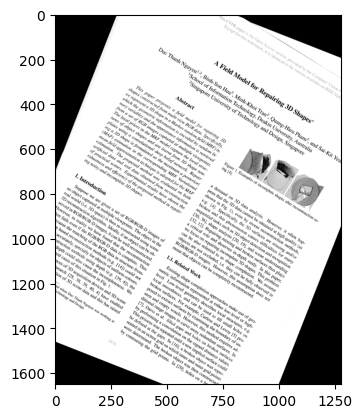

Threshold:  30


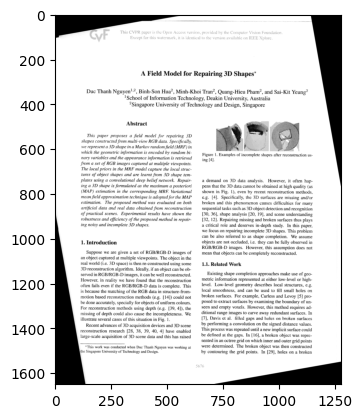

The type of lines for threshold 50 is None,so can't append angles


In [56]:
threshold = [10,30,50]
for i in threshold:
  lines = cv.HoughLines(candidate_points, spatial_res, angular_res, i)
  angles = []
  if type(lines) != type(None):
      for k in range(0,len(lines)):
           distance, angle = lines[k][0]
           angles.append(angle)
  else:
    print("The type of lines for threshold",i,"is None,so can't append angles")
    break

  angles = statistics.median(angles)
  document_angle = angles - math.pi / 2

  height, width = doc.shape
  c_x = (width - 1) / 2.0 # column index varies in [0, width-1]
  c_y = (height - 1) / 2.0 # row index varies in [0, height-1]
  c = (c_x, c_y) # A point is defined by x and y coordinate
  M = cv.getRotationMatrix2D(c, document_angle*180/math.pi, 1)
  doc_deskewed = cv.warpAffine(doc, M, (width, height))
  print('Threshold: ',i)
  plt.imshow(doc_deskewed, 'gray')
  plt.show()

### In the process of dewskewing the image ,the density_threshold of 10 and 30 both works the best for the doc.jpg to keep the same skew angle of the doc image but for the threshold 50,it makes the type of the lines to None which creates problem in appending or collecting the angles thus the whole process is disturbed.

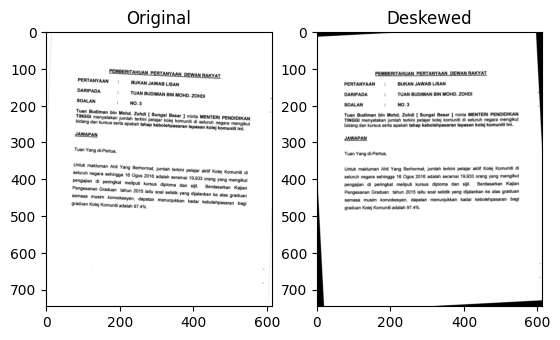

No lines detected in image doc2.jpg. Skipping this image


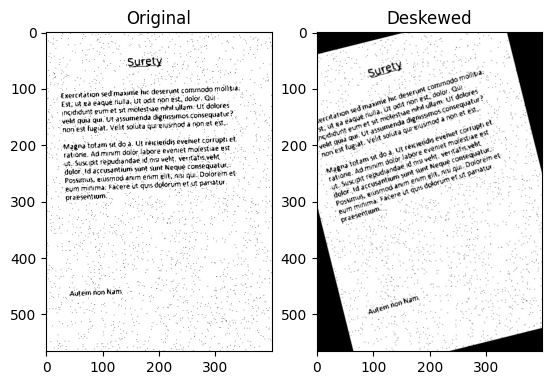

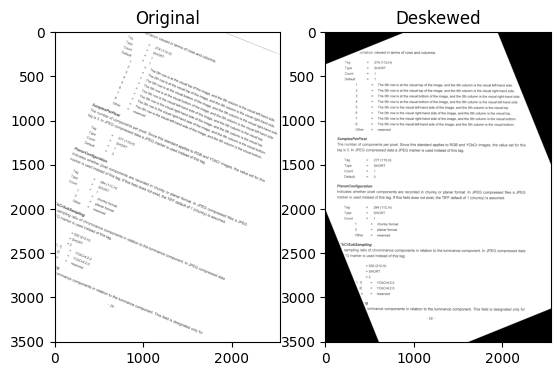

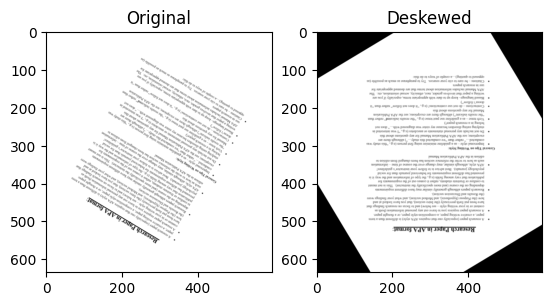

In [80]:
for index in range(1, 6):
    i = str(index)  # Convert index to string for filename
    doc = cv.imread('/content/drive/MyDrive/Skew_image/doc' + i + '.jpg', 0)
    threshold = 200
    ret, doc_bin = cv.threshold(doc, threshold, 255, cv.THRESH_BINARY)
    doc_bin = 255 - doc_bin

    num_labels, labels, stats, centroids = cv.connectedComponentsWithStats(doc_bin, connectivity=8)

    candidate_points = np.zeros(doc_bin.shape, dtype="uint8")


    for centroid in centroids.astype(int):
        v = centroid
        x = v[0]
        y = v[1]
        candidate_points[int(y),int(x)] = 255

    spatial_res = 1
    angular_res = math.pi / 180
    threshold = 10

    lines = cv.HoughLines(candidate_points, spatial_res, angular_res, threshold)

    # Check if lines were detected
    if lines is not None:
        angles = []
        for k in range(0, len(lines)):
            distance, angle = lines[k][0]
            angles.append(angle)

        angles = statistics.median(angles)

        document_angle = angles - math.pi / 2
        # Rotate image
        height, width = doc.shape
        c_x = (width - 1) / 2.0  # column index varies in [0, width-1]
        c_y = (height - 1) / 2.0  # row index varies in [0, height-1]
        c = (c_x, c_y)  # A point is defined by x and y coordinate
        M = cv.getRotationMatrix2D(c, document_angle*180/math.pi, 1)
        doc_deskewed = cv.warpAffine(doc, M, (width, height))

        f = plt.figure()
        f.add_subplot(1,2, 1)
        plt.title('Original')
        plt.imshow(doc,'gray')
        f.add_subplot(1,2, 2)
        plt.title('Deskewed')
        plt.imshow(doc_deskewed,'gray')
        plt.show(block=True)
        l = 'deskewed' + i + '.jpg' # i is now the string index
        cv.imwrite(l, doc_deskewed)
    else:
        print(f"No lines detected in image doc{i}.jpg. Skipping this image")

In [129]:
def preprocess_image(image_path):
    # Read the image in grayscale
    doc = cv.imread(image_path, 0)

    # Apply thresholding
    threshold = 200
    ret, doc_bin = cv.threshold(doc, threshold, 255, cv.THRESH_BINARY)
    doc_bin = 255 - doc_bin

    num_labels, labels, stats, centroids = cv.connectedComponentsWithStats(doc_bin, connectivity=8)

    candidate_points = np.zeros(doc_bin.shape, dtype="uint8")

    for i in range(1, len(centroids)):
          component_points = np.argwhere(labels == i)
          if component_points.size > 0:
              max_point = component_points[np.argmax(component_points[:, 1])]
              candidate_points[max_point[0], max_point[1]] = 255

    # Hough Line Transformation
    spatial_res = 1
    angular_res = math.pi / 180
    threshold = 30
    lines = cv.HoughLines(candidate_points, spatial_res, angular_res, threshold)

    # Calculate median angle
    angles = []
    for k in range(0, len(lines)):
        distance, angle = lines[k][0]
        angles.append(angle)

    median_angle = statistics.median(angles)
    document_angle = median_angle - math.pi / 2

    # Rotate image to deskew
    c_x = (width - 1) / 2.0  # column index varies in [0, width-1]
    c_y = (height - 1) / 2.0  # row index varies in [0, height-1]
    c = (c_x, c_y)  # A point is defined by x and y coordinate
    M = cv.getRotationMatrix2D(c, document_angle*180/math.pi, 1)
    doc_deskewed = cv.warpAffine(doc, M, (width, height))

    return doc, doc_deskewed

In [130]:
image_path = '/content/drive/MyDrive/Resources_2.2/doc.jpg'
original_image, deskewed_image = preprocess_image(image_path)

In [131]:
pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'

In [132]:
text_skewed = pytesseract.image_to_string(original_image)
text_deskewed = pytesseract.image_to_string(deskewed_image)

In [133]:
print("Recognized Text from Skewed Image:\n", text_skewed)

Recognized Text from Skewed Image:
  

 

A Fielg Mode fo Pairing 3D Shapes«
Uc Thanh Nguyen! #. Binh-g a? Mi Ol Tran?
1S 001 of 1, n

im", and §
eak: Niversit Ustralig
log id i

   

  

° 28S raised :
Sented in ai

ducted When Due Thanh Neuyen was Working ap

sity °F Technology and Design.



In [134]:
print("\nRecognized Text from Deskewed Image:\n", text_deskewed)


Recognized Text from Deskewed Image:
 SS

A Field M

Duc Thanh Nguyen! ”, Binh-Son Hué
‘School of Informati
?Singapore Univer

Abstract

This paper proposes a field model for re
shapes constructed from multi-view RGB data. .
we represent a 3D shape in a Marko random fie
which the geometric information is encoded by
nary variables and the appearance information
from a set of RGB images captured at multiple
The local priors in the MRF model capture the

  



In [135]:
pdf_skewed = pytesseract.image_to_pdf_or_hocr(original_image, extension='pdf')
with open('skewed_text.pdf', 'w+b') as f:
    f.write(pdf_skewed)

In [136]:
pdf_deskewed = pytesseract.image_to_pdf_or_hocr(deskewed_image, extension='pdf')
with open('deskewed_text.pdf', 'w+b') as f:
    f.write(pdf_deskewed)

Text(0.5, 1.0, 'Text from Skewed Image')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12 () missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


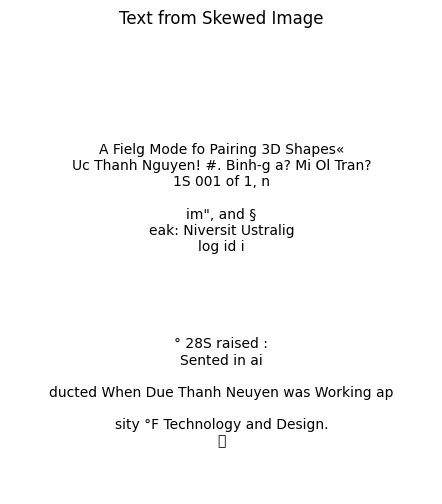

In [137]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.text(0.5, 0.5, text_skewed, ha='center', va='center', wrap=True)
plt.axis('off')
plt.title('Text from Skewed Image')

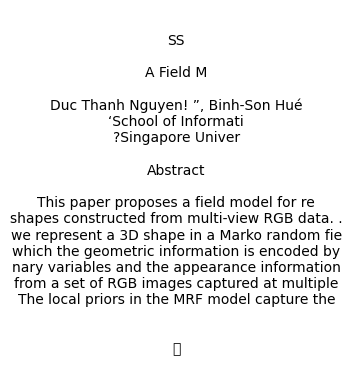

In [138]:
plt.subplot(1, 2, 2)
plt.text(0.5, 0.5, text_deskewed, ha='center', va='center', wrap=True)
plt.axis('off')
plt.show()